In [1]:
pip install nnfs

You should consider upgrading via the '/Users/robbymoseley/Desktop/Python 3.9 Virtualenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
from nnfs.datasets import spiral_data

In [6]:
import numpy as np

In [7]:
nnfs.init()

In [34]:
# we will be using these two functions to create the weights and biases for network
print(np.random.randn(2, 5))
print(np.zeros((2, 5)))

[[ 0.8655252   1.2740445  -0.7977028   0.4693722  -1.3946797 ]
 [ 0.37317473  1.0826722  -0.14958951  1.072636   -1.1385679 ]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


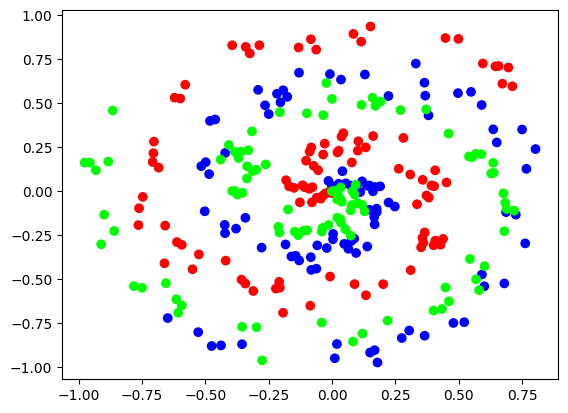

In [39]:
# We will also be using the spiral data set we imported above
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [28]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [29]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# Let's see output of the first few samples:
print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-7.0070387e-06  1.8598486e-06  8.8673667e-05]
 [-2.2532661e-04 -3.8579231e-04  6.2624604e-05]
 [-1.4673114e-04 -2.1661913e-04  2.5737012e-04]
 [-3.9975205e-04 -6.6638394e-04  2.2407433e-04]]


In [30]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [31]:
  # Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Make a forward pass of our training data through this layer
dense1.forward(X)
# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)

print(activation1.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.0716949e-05 0.0000000e+00 0.0000000e+00]
 [1.6327031e-04 0.0000000e+00 0.0000000e+00]
 [2.4552186e-04 0.0000000e+00 0.0000000e+00]
 [1.6364703e-04 0.0000000e+00 0.0000000e+00]]


In [12]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities


In [13]:
x, y = spiral_data(samples=100, classes=3)

# create our first layer
dense1 = Layer_Dense(2, 3)

# specify which activation function we will use on our first layer
activation1 = Activation_ReLU()

# specify our second layer - this will be our output layer
dense2 = Layer_Dense(3, 3)

# specify the activation function for our second layer
activation2 = Activation_Softmax()

# pass the data through our neural network
dense1.forward(x)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

# print the output of our network
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]


In [14]:
# Part 2: Loss Functions

In [21]:
# Common loss class
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss): # Forward pass
    def forward(self, y_pred, y_true): # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped*y_true,
                axis=1 )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [22]:
# COPY CODE FROM FIRST PART

In [23]:
x, y = spiral_data(samples=100, classes=3)

# create our first layer
dense1 = Layer_Dense(2, 3)

# specify which activation function we will use on our first layer
activation1 = Activation_ReLU()

# specify our second layer - this will be our output layer
dense2 = Layer_Dense(3, 3)

# specify the activation function for our second layer
activation2 = Activation_Softmax()

# specify the loss function we will be using
loss_function = Loss_CategoricalCrossentropy()

# pass the data through our neural network
dense1.forward(x)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

# print the output of our network
print(activation2.output[:5])

# Perform a forward pass through activation function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)

# Print loss value -> the closer to 0 the more accurate our network is getting
print('loss:', loss)

[[0.33333334 0.33333334 0.33333334]
 [0.33333308 0.33333334 0.33333355]
 [0.3333332  0.33333355 0.3333332 ]
 [0.33333248 0.33333322 0.33333427]
 [0.33333248 0.33333352 0.333334  ]]
loss: 1.0986123


In [26]:
# Calculate accuracy of the network
# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(activation2.output, axis=1)

if len(y.shape) == 2:
    y = np.argmax(y, axis=1)

accuracy = np.mean(predictions == y)
# Print accuracy
print('acc:', accuracy)

acc: 0.35
